In [2]:
import pandas as pd
import numpy as np

def recall_from_pr_df(pr_df, precision_value=0.75):
    recalls_dict = {}
    classes = pr_df.family.unique()

    for cls in classes:
        cls_pr = pr_df[pr_df.family == cls]
        bins = cls_pr.range.unique()
        recalls_dict[cls] = {}

        for bin in bins[:-1]:
            cls_bin_pr = cls_pr[cls_pr.range == bin]
            precisions = cls_bin_pr.precision.values  # [2:-2]
            recalls = cls_bin_pr.recall.values  # [2:-2]

            # Sort by recalls
            sorted_indices = np.argsort(recalls)[::-1]
            precisions = precisions[sorted_indices]
            recalls = recalls[sorted_indices]

            # Traverse through sorted values and apply the new logic
            
            for i in range(len(precisions)):
                if precisions[i] >= precision_value:
                    if i == 0:
                        recall = recalls[i]
                    else:
                        recall = np.interp(
                            precision_value,
                            [precisions[i-1], precisions[i]],
                            [recalls[i-1], recalls[i]]
                        )
                    break
            else:
                # If no precision meets the target, use the last available recall
                recall = recalls[-1]

            recalls_dict[cls][bin] = recall

    return recalls_dict

In [3]:
pr_0 = pd.read_csv("/home/b2b/arthur/git/codetr/work_dirs/default_600_crop_01_lr/NewEval_ep0/outputs/all_kpis.tsv", sep = '\t')
pr_1 = pd.read_csv("/home/b2b/arthur/git/codetr/work_dirs/default_600_crop_01_lr/NewEval_ep1/outputs/all_kpis.tsv", sep = '\t')
pr_2 = pd.read_csv("/home/b2b/arthur/git/codetr/work_dirs/default_600_crop_01_lr/NewEval_ep2/outputs/all_kpis.tsv", sep = '\t')
pr_3 = pd.read_csv("/home/b2b/arthur/git/codetr/work_dirs/default_600_crop_01_lr/NewEval_ep3/outputs/all_kpis.tsv", sep = '\t')
pr_4 = pd.read_csv("/home/b2b/arthur/git/codetr/work_dirs/default_600_crop_01_lr/NewEval_ep4/outputs/all_kpis.tsv", sep = '\t')
pr_5 = pd.read_csv("/home/b2b/arthur/git/codetr/work_dirs/default_600_crop_01_lr/NewEval_ep5/outputs/all_kpis.tsv", sep = '\t')

In [4]:
target_pr = 0.9

recs_0 = recall_from_pr_df(pr_0, precision_value=target_pr)
recs_1 = recall_from_pr_df(pr_1, precision_value=target_pr)
recs_2 = recall_from_pr_df(pr_2, precision_value=target_pr)
recs_3 = recall_from_pr_df(pr_3, precision_value=target_pr)
recs_4 = recall_from_pr_df(pr_4, precision_value=target_pr)
recs_5 = recall_from_pr_df(pr_5, precision_value=target_pr)

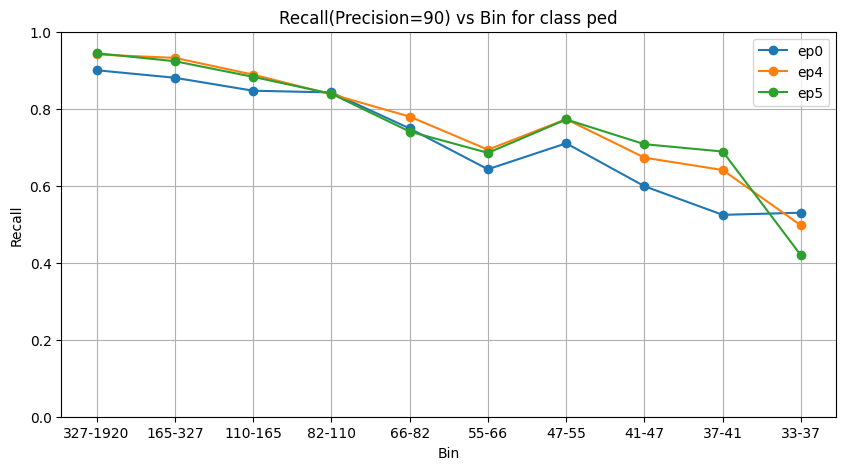

In [5]:
import matplotlib.pyplot as plt

cls = 'ped'

bins_data_0 = recs_0[cls]
bins_data_1 = recs_1[cls]
bins_data_2 = recs_2[cls]
bins_data_3 = recs_3[cls]
bins_data_4 = recs_4[cls]
bins_data_5 = recs_5[cls]


bins_0 = list(bins_data_0.keys())
recalls_0 = list(bins_data_0.values())
bins_1 = list(bins_data_1.keys())
recalls_1 = list(bins_data_1.values())
bins_2 = list(bins_data_2.keys())
recalls_2 = list(bins_data_2.values())
bins_3 = list(bins_data_3.keys())
recalls_3 = list(bins_data_3.values())
bins_4 = list(bins_data_4.keys())
recalls_4 = list(bins_data_4.values())
bins_5 = list(bins_data_5.keys())
recalls_5 = list(bins_data_5.values())

plt.figure(figsize=(10, 5))
plt.plot(bins_0, recalls_0, marker='o', linestyle='-', label = 'ep0')
#plt.plot(bins_1, recalls_1, marker='o', linestyle='-', label = 'ep1')
#plt.plot(bins_2, recalls_2, marker='o', linestyle='-', label = 'ep2')
#plt.plot(bins_3, recalls_3, marker='o', linestyle='-', label = 'ep3')
plt.plot(bins_4, recalls_4, marker='o', linestyle='-', label = 'ep4')
plt.plot(bins_5, recalls_5, marker='o', linestyle='-', label = 'ep5')


plt.xlabel('Bin')
plt.ylabel('Recall')
plt.title(f'Recall(Precision={int(target_pr*100)}) vs Bin for class {cls}')
plt.legend()
plt.ylim(0, 1)
plt.grid(True)

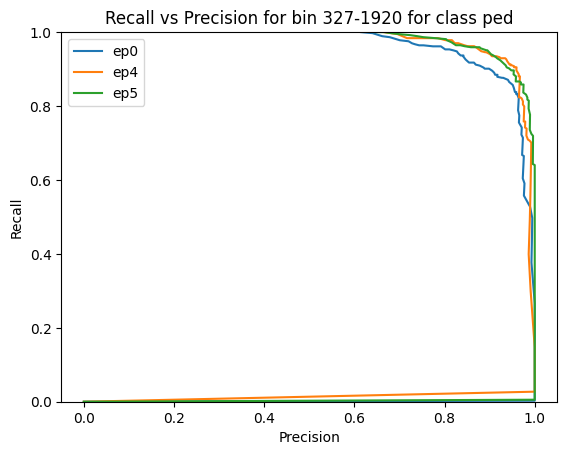

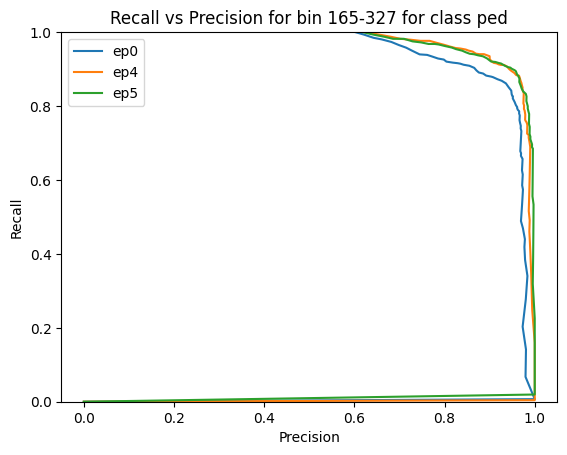

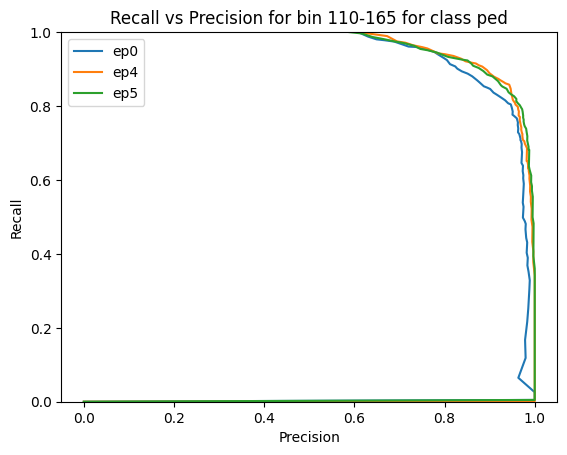

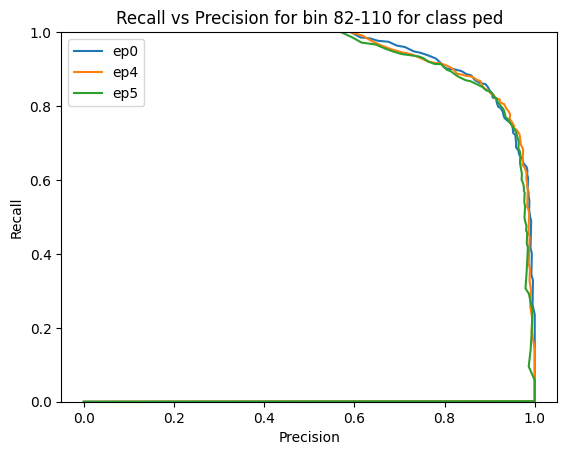

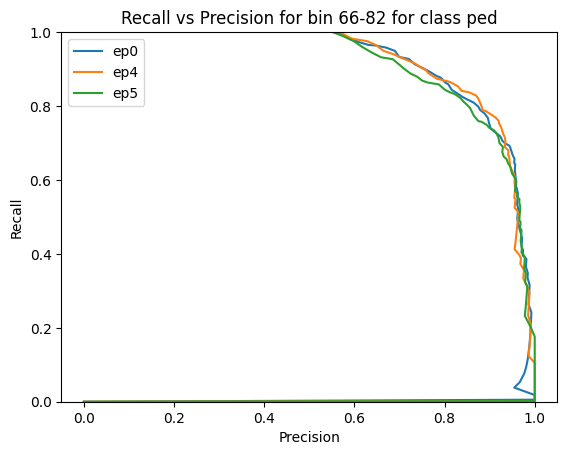

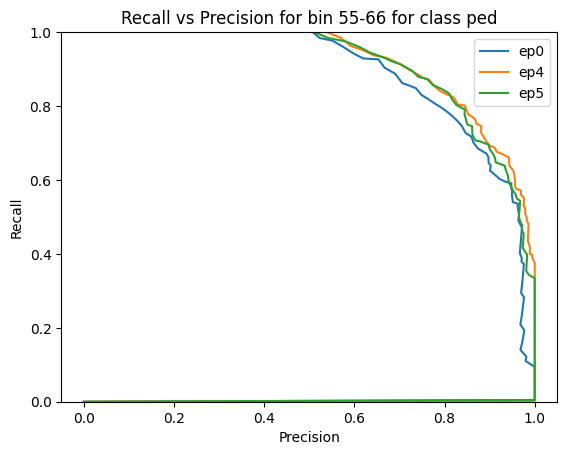

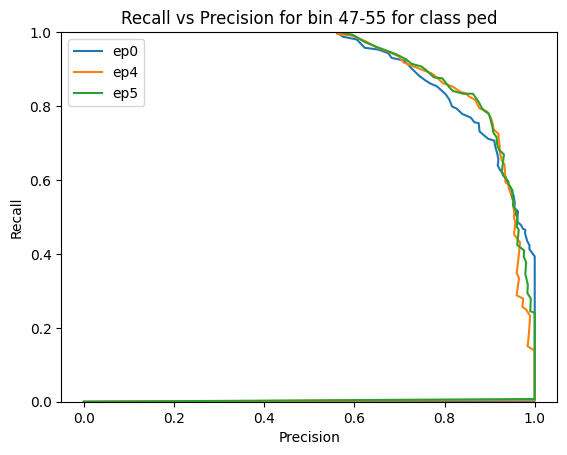

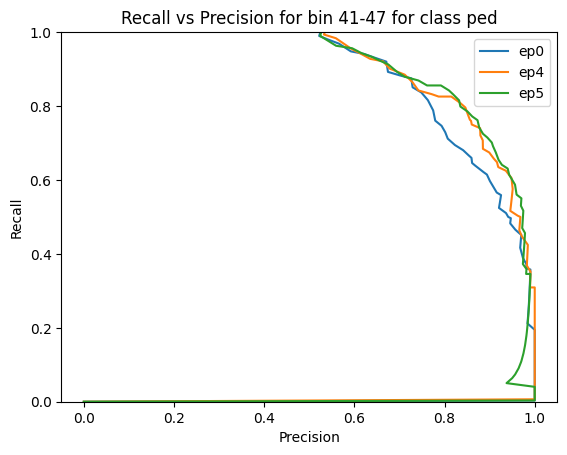

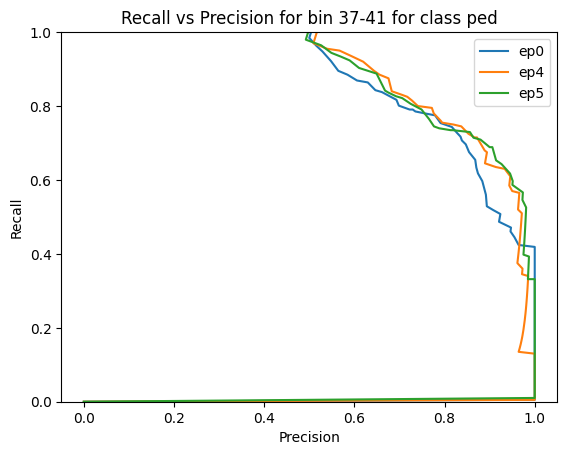

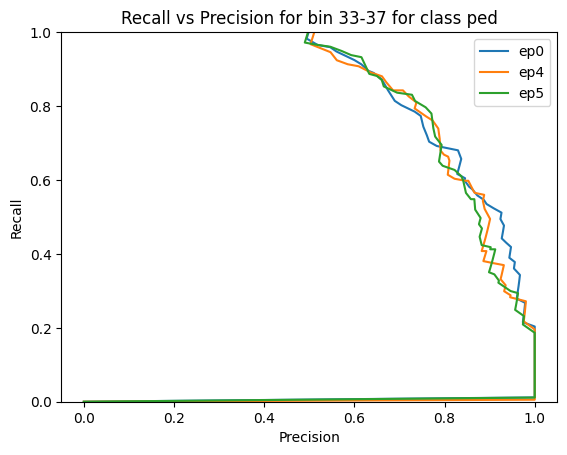

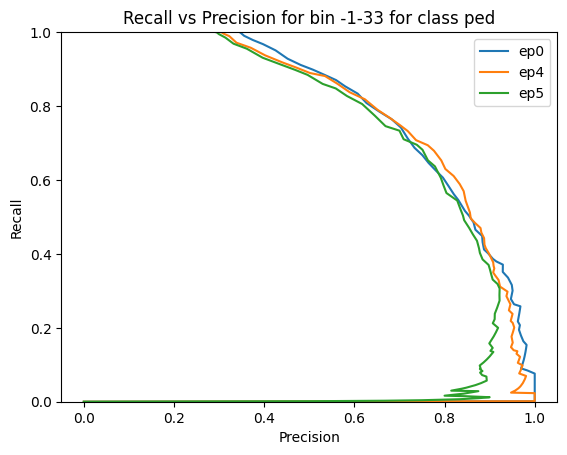

In [7]:
cls = 'ped'

ranges = pr_0[pr_0.family == cls].range.unique()

for rng in ranges:
    precisions_0 = pr_0[(pr_0.range == rng) & (pr_0.family == cls)].precision.values
    recalls_0 = pr_0[(pr_0.range == rng) & (pr_0.family == cls)].recall.values

    precisions_1 = pr_1[(pr_1.range == rng) & (pr_1.family == cls)].precision.values
    recalls_1 = pr_1[(pr_1.range == rng) & (pr_1.family == cls)].recall.values

    precisions_2 = pr_2[(pr_2.range == rng) & (pr_2.family == cls)].precision.values
    recalls_2 = pr_2[(pr_2.range == rng) & (pr_2.family == cls)].recall.values

    precisions_3 = pr_3[(pr_3.range == rng) & (pr_3.family == cls)].precision.values
    recalls_3 = pr_3[(pr_3.range == rng) & (pr_3.family == cls)].recall.values

    precisions_4 = pr_4[(pr_4.range == rng) & (pr_4.family == cls)].precision.values
    recalls_4 = pr_4[(pr_4.range == rng) & (pr_4.family == cls)].recall.values

    precisions_5 = pr_5[(pr_5.range == rng) & (pr_5.family == cls)].precision.values
    recalls_5 = pr_5[(pr_5.range == rng) & (pr_5.family == cls)].recall.values


    plt.plot(precisions_0, recalls_0, label = 'ep0')
    #plt.plot(precisions_1, recalls_1, label = 'ep1')

    #plt.plot(precisions_3, recalls_3, label = 'ep3')
    plt.plot(precisions_4, recalls_4, label = 'ep4')
    plt.plot(precisions_5, recalls_5, label = 'ep5')




    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title(f'Recall vs Precision for bin {rng} for class {cls}')
    plt.legend()
    plt.ylim(0, 1)
    plt.show()